<a href="https://colab.research.google.com/github/Jaya17-11/Sentiment-Analysis/blob/main/ML_Project_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real-Time Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,  accuracy_score

In [2]:
# Checking whether NLTK installed or not
%pip install nltk

In [3]:
df=pd.read_csv("/content/IMDB Dataset.csv")
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Assuming 'review' is the column with text data and 'sentiment' is the target column
x = df['review']
y = df['sentiment']

print("Features (x) and Target (y) selected successfully.")
print("\nFirst 5 reviews (x):")
display(x.head())
print("\nFirst 5 sentiments (y):")
display(y.head())

Features (x) and Target (y) selected successfully.

First 5 reviews (x):


,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."



First 5 sentiments (y):


,sentiment
0,positive
1,positive
2,positive
3,negative
4,positive


In [5]:
# Import libraries for text preprocessing and feature extraction
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK data (run this once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'<.*?>', ' ', text)   # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower() #Remove alphanumeric and convert to lowercase
    words = text.split()  # Tokenize the text
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the review columns
print("Applying text preprocessing...")
x_processed = x.apply(preprocess_text)

print("Text preprocessing complete.")
display(x_processed.head())

Applying text preprocessing...
Text preprocessing complete.


,review
0,one review mention watch oz episod youll hook ...
1,wonder littl product film techniqu unassum old...
2,thought wonder way spend time hot summer weeke...
3,basic there famili littl boy jake think there ...
4,petter mattei love time money visual stun film...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2500) # Example: consider top 2500 features

print("Performing TF-IDF feature extraction...")
x_tfidf = tfidf_vectorizer.fit_transform(x_processed)

print("TF-IDF feature extraction complete.")
print("Shape of TF-IDF features:", x_tfidf.shape)

Performing TF-IDF feature extraction...
TF-IDF feature extraction complete.
Shape of TF-IDF features: (50000, 2500)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data split into training and testing sets.
Shape of x_train: (40000, 2500)
Shape of x_test: (10000, 2500)
Shape of y_train: (40000,)
Shape of y_test: (10000,)


## K-Nearest Neighbors (KNN)
## Training the model with KNN

K-Nearest Neighbors (KNN) is a simple, non-parametric supervised learning algorithm used for classification and regression. The core idea is that data points that are close to each other are likely to belong to the same class.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of k values to test
param_grid = {'n_neighbors': np.arange(1, 31, 2)} # Test k from 1 to 29 with step 2

# Initialize KNN classifier
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')

print("Performing GridSearchCV to find optimal k...")
print("This may take some time depending on the dataset size and the parameter grid.")

subset_size = 10000 # Example: use 10,000 samples for GridSearchCV

# Ensure subset_size is not larger than the actual training data size
if subset_size > x_train.shape[0]:
    subset_size = x_train.shape[0]

np.random.seed(42) # Add this line if you haven't set a global random state
subset_indices = np.random.choice(x_train.shape[0], size=subset_size, replace=False)

x_train_subset = x_train[subset_indices]
y_train_subset = y_train.iloc[subset_indices] # Use .iloc with the indices

print(f"Using a subset of size {subset_size} for GridSearchCV.")
print("Shape of x_train_subset:", x_train_subset.shape)
print("Shape of y_train_subset:", y_train_subset.shape)

grid_search.fit(x_train_subset, y_train_subset)

print("GridSearchCV complete.")

# Get the best k value and the best score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Optimal k found on the subset: {best_k}")
print(f"Best cross-validation accuracy on the subset: {best_score:.4f}")

# You can now train your final KNN model using the optimal k on the entire training data
optimal_knn = KNeighborsClassifier(n_neighbors=best_k)
optimal_knn.fit(x_train, y_train)
print("\nOptimal KNN model trained.")


Performing GridSearchCV to find optimal k...
This may take some time depending on the dataset size and the parameter grid.
Using a subset of size 10000 for GridSearchCV.
Shape of x_train_subset: (10000, 2500)
Shape of y_train_subset: (10000,)
GridSearchCV complete.
Optimal k found on the subset: 29
Best cross-validation accuracy on the subset: 0.7830

Optimal KNN model trained.


# Testing with user input

In [ ]:
# Function to predict sentiment for a given review
def predict_sentiment(review):
    processed_review = preprocess_text(review)
    review_tfidf = tfidf_vectorizer.transform([processed_review])

    # Predict the sentiment using the trained KNN model
    prediction = optimal_knn.predict(review_tfidf)

    return prediction[0]

# Get user input for a review
user_review = input("Enter a movie review: ")
predicted_sentiment = predict_sentiment(user_review)
print(f"\nPredicted sentiment: {predicted_sentiment}")

Enter a movie review: "It's full of laughable clichés; I'm still amazed that the actors delivered their lines with a straight face." This focuses on the predictability of the script and the poor acting.

Predicted sentiment: negative


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = optimal_knn.predict(x_test)

# Evaluate the model
print("Model Evaluation on the Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation on the Test Set:
Accuracy: 0.7877

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.72      0.77      4961
    positive       0.76      0.85      0.80      5039

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



# Naive Bayes
## Training the model with Naive Bayes

Naive Bayes is a probabilistic machine learning algorithm based on the Bayes' Theorem with a "naive" assumption of conditional independence between features. It is widely used for text classification tasks like sentiment analysis due to its simplicity and efficiency.

In [ ]:
# import naive_bayes
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Naive Bayes model
print("Training Naive Bayes model...")
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
print("Naive Bayes model trained.")

Training Naive Bayes model...
Naive Bayes model trained.


## Naive Bayes Model Evaluation - Confusion Matrix

Confusion Matrix for Naive Bayes Model:
[[4153  808]
 [ 734 4305]]


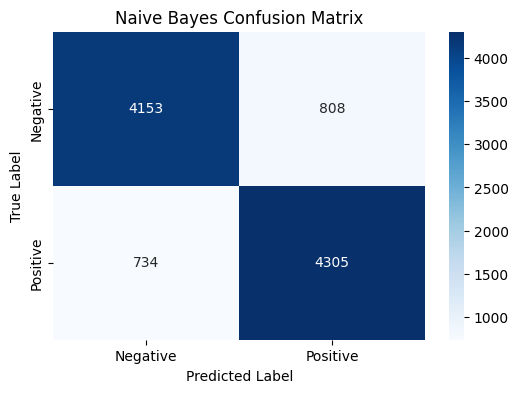

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_nb = nb_model.predict(x_test)

# Calculate the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Display the confusion matrix
print("Confusion Matrix for Naive Bayes Model:")
print(cm_nb)

# Optionally, visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [ ]:
y_pred_nb = nb_model.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

# Print the calculated accuracy and the classification report
print("Naive Bayes Model Evaluation on the Test Set:")
print("Accuracy:", accuracy_nb)
print("\nClassification Report:")
print(classification_report_nb)

Naive Bayes Model Evaluation on the Test Set:
Accuracy: 0.8458

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.84      0.84      4961
    positive       0.84      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Comparing results

Compare the performance of the Naive Bayes model with the previously trained KNN model.


In [ ]:
knn_accuracy = optimal_knn.score(x_test, y_test)

# Print both accuracies for comparison
print(f"Naive Bayes Model Test Accuracy: {accuracy_nb:.4f}")
print(f"KNN Model Test Accuracy: {knn_accuracy:.4f}")

# Briefly discuss the performance comparison
if accuracy_nb > knn_accuracy:
    print("\nBased on accuracy, the Naive Bayes model performed better than the KNN model.")
elif knn_accuracy > accuracy_nb:
    print("\nBased on accuracy, the KNN model performed better than the Naive Bayes model.")
else:
    print("\nBoth models achieved the same accuracy on the test set.")

Naive Bayes Model Test Accuracy: 0.8458
KNN Model Test Accuracy: 0.7877

Based on accuracy, the Naive Bayes model performed better than the KNN model.


Testing the model with user input

In [ ]:
def predict_sentiment_nb(review):
    processed_review = preprocess_text(review)
    review_tfidf = tfidf_vectorizer.transform([processed_review])

    # Predict the sentiment using the trained Naive Bayes model
    prediction = nb_model.predict(review_tfidf)

    return prediction[0]

sample_review = "This movie was absolutely fantastic! I loved every minute of it."
predicted_sentiment_nb = predict_sentiment_nb(sample_review)

print(f"Sample Review: '{sample_review}'")
print(f"Predicted sentiment (Naive Bayes): {predicted_sentiment_nb}")
user_review_nb = input("Enter another movie review for Naive Bayes prediction: ")
predicted_sentiment_user_nb = predict_sentiment_nb(user_review_nb)
print(f"\nPredicted sentiment (Naive Bayes) for your review: {predicted_sentiment_user_nb}")

Sample Review: 'This movie was absolutely fantastic! I loved every minute of it.'
Predicted sentiment (Naive Bayes): positive
Enter another movie review for Naive Bayes prediction: Say the type of film and when it was made

Predicted sentiment (Naive Bayes) for your review: negative


#Training the model with SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.svm import LinearSVC

# Initialize and train the LinearSVC model
print("Training LinearSVC model...")
svm_model = LinearSVC(random_state=42) # Add random_state for reproducibility
svm_model.fit(x_train, y_train)
print("LinearSVC model trained.")

Training LinearSVC model...
LinearSVC model trained.


## SVM Model Evaluation - Confusion Matrix

Confusion Matrix for SVM Model:
[[4280  681]
 [ 558 4481]]


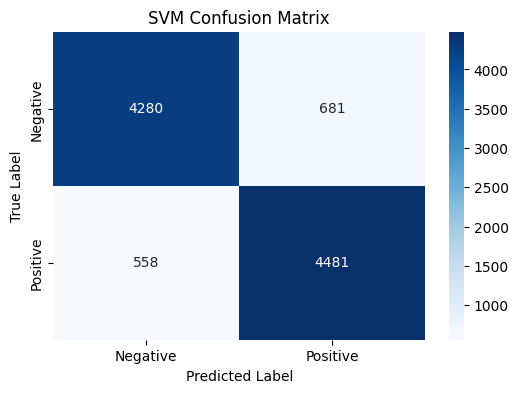

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_svm = svm_model.predict(x_test)

# Calculate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Display the confusion matrix
print("Confusion Matrix for SVM Model:")
print(cm_svm)

# Optionally, visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()

## SVM Model Evaluation - ROC Curve and AUC

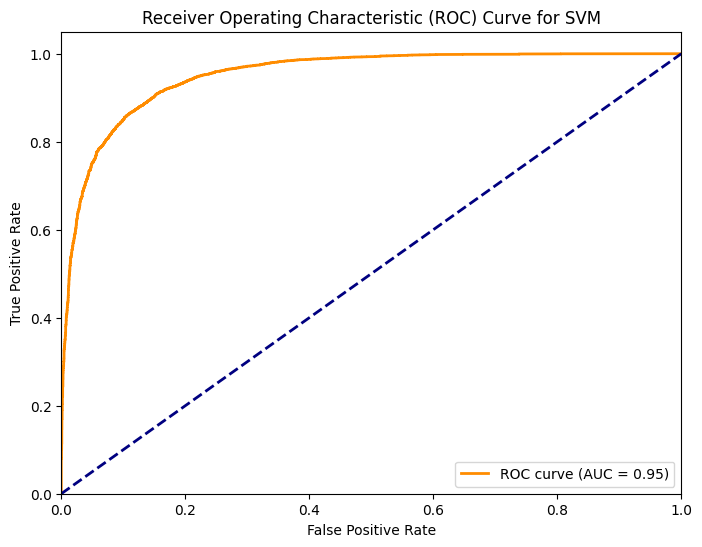

SVM Model ROC AUC: 0.9511


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Convert sentiment labels to numerical (0 for negative, 1 for positive) for ROC curve
label_encoder = LabelEncoder()
# Fit the label encoder on the entire sentiment column (y)
label_encoder.fit(y)

y_test_numeric = label_encoder.transform(y_test)
y_pred_svm_numeric = label_encoder.transform(y_pred_svm)

y_scores_svm = svm_model.decision_function(x_test)

# Calculate ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_numeric, y_scores_svm)

# Calculate AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()

print(f"SVM Model ROC AUC: {roc_auc_svm:.4f}")

In [ ]:
y_pred_svm = svm_model.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

# Print the calculated accuracy and the classification report
print("SVM Model Evaluation on the Test Set:")
print("Accuracy:", accuracy_svm)
print("\nClassification Report:")
print(classification_report_svm)

SVM Model Evaluation on the Test Set:
Accuracy: 0.8761

Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.86      0.87      4961
    positive       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Comparing results

Compare the performance of the SVM model with the previously trained KNN and Naive Bayes models.


In [ ]:
print(f"Naive Bayes Model Test Accuracy: {accuracy_nb:.4f}")
knn_accuracy = optimal_knn.score(x_test, y_test)
print(f"KNN Model Test Accuracy: {knn_accuracy:.4f}")
print(f"SVM Model Test Accuracy: {accuracy_svm:.4f}")

# Compare the accuracies of the three models
print("\n--- Model Comparison ---")
if accuracy_svm > accuracy_nb and accuracy_svm > knn_accuracy:
    print("The SVM model performed best on the test set.")
elif accuracy_nb > accuracy_svm and accuracy_nb > knn_accuracy:
    print("The Naive Bayes model performed best on the test set.")
elif knn_accuracy > accuracy_svm and knn_accuracy > accuracy_nb:
    print("The KNN model performed best on the test set.")
elif accuracy_svm == accuracy_nb and accuracy_svm > knn_accuracy:
    print("The SVM and Naive Bayes models performed equally best on the test set.")
elif accuracy_svm == knn_accuracy and accuracy_svm > accuracy_nb:
    print("The SVM and KNN models performed equally best on the test set.")
elif accuracy_nb == knn_accuracy and accuracy_nb > accuracy_svm:
    print("The Naive Bayes and KNN models performed equally best on the test set.")
else:
    print("All three models performed equally on the test set or their performance is very close.")


Naive Bayes Model Test Accuracy: 0.8458
KNN Model Test Accuracy: 0.7877
SVM Model Test Accuracy: 0.8761

--- Model Comparison ---
The SVM model performed best on the test set.


Testing SVM with user input

In [ ]:
# Define a function to predict sentiment for a given review using the SVM model
def predict_sentiment_svm(review):
    processed_review = preprocess_text(review)
    review_tfidf = tfidf_vectorizer.transform([processed_review])

    # Predict the sentiment using the trained SVM model
    prediction = svm_model.predict(review_tfidf)

    return prediction[0]
sample_review_svm = "This movie was absolutely amazing! The acting was superb and the story was captivating."
predicted_sentiment_svm = predict_sentiment_svm(sample_review_svm)

print(f"Sample Review: '{sample_review_svm}'")
print(f"Predicted sentiment (SVM): {predicted_sentiment_svm}")

# Optionally, include code to take a movie review as input from the user
user_review_svm = input("Enter another movie review for SVM prediction: ")
predicted_sentiment_user_svm = predict_sentiment_svm(user_review_svm)
print(f"\nPredicted sentiment (SVM) for your review: {predicted_sentiment_user_svm}")

Sample Review: 'This movie was absolutely amazing! The acting was superb and the story was captivating.'
Predicted sentiment (SVM): positive
Enter another movie review for SVM prediction: I love the actors in this film.

Predicted sentiment (SVM) for your review: positive


# Performance metrics for KNN,Naive Bayes,SVM

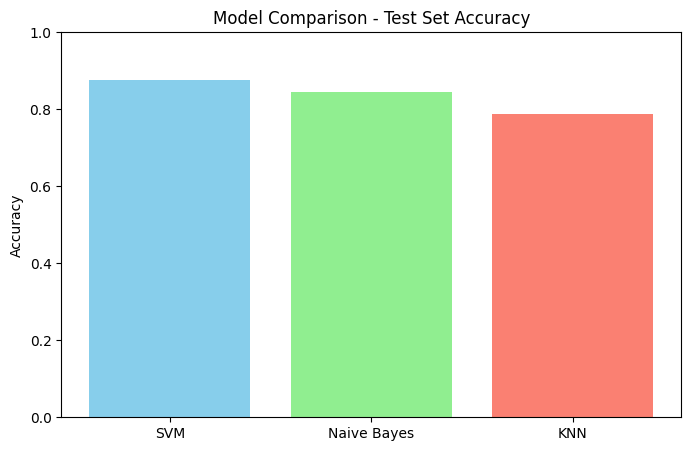

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


model_names = ['KNN', 'Naive Bayes', 'SVM']
accuracy_scores = [knn_accuracy, accuracy_nb, accuracy_svm]

# Create a pandas DataFrame for easier plotting
performance_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores
})

# Sort the DataFrame by accuracy for better visualization (optional)
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(performance_df['Model'], performance_df['Accuracy'], color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.ylabel('Accuracy')
plt.title('Model Comparison - Test Set Accuracy')
plt.show()

In [ ]:
import joblib

# Assuming svm_model is your best performing model and label_encoder is used for sentiment labels
joblib.dump(svm_model, "final_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
# There is no scaler used in this notebook, so we won't save a scaler.

print(" Final Model + Encoder Saved Successfully!")

 Final Model + Encoder Saved Successfully!


In [ ]:
import joblib
import pandas as pd

# Load the saved model and label encoder
try:
    loaded_model = joblib.load("final_model.pkl")
    loaded_label_encoder = joblib.load("label_encoder.pkl")
    print("Model and label encoder loaded successfully.")
except FileNotFoundError:
    print("Error: Model or label encoder file not found. Please make sure 'final_model.pkl' and 'label_encoder.pkl' exist.")
except Exception as e:
    print(f"An error occurred while loading the files: {e}")

Model and label encoder loaded successfully.
